In [3]:
# This question is an arithmetic sum question and has an easy analytical answer. 
# the last number that is divisible by 3 is 999 and the last number divisible by 5 995
# So as not to double count, you'll want to subtract all the numbers that are divisible by both 3 and 5. 
t_n_3 = 999//3
t_n_5 = 999//5
t_n_15 = 999//15
print('number of terms', t_n_3,' : nth term ', t_n_3*3)
print('number of terms', t_n_5,' : nth term ', t_n_5*5)
print('number of terms ', t_n_15,' : nth term ', t_n_15*15)

# now compute the arithmetic sum given Gauss' equation (n/2)*(t_n +t_1) for both and add them together and subtract doubles. 
n_sum = ((t_n_3/2)*((t_n_3*3)+3)) +  ((t_n_5/2)*((t_n_5*5)+5)) - ((t_n_15/2)*((t_n_15*15)+15))
print('sum of all numbers below 1000 divisible by 3 or 5: ',int(n_sum))

number of terms 333  : nth term  999
number of terms 199  : nth term  995
number of terms  66  : nth term  990
sum of all numbers below 1000 divisible by 3 or 5:  233168


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
def sum_calc(list_of_multiples, end): # user defined function to compute
    num_terms = [] #initialize lists
    nth_sum = []
    lcm = np.prod(list_of_multiples) #least common multiple to eliminate doubles (like 15 and 30)
    list_of_multiples.append(lcm) # put the lcm at the end of the list of multiples
    
    for i in range(0,len(list_of_multiples)): #iterate
        t_n_i = end//(list_of_multiples[i]) # number of terms in the sequence for each multiple
        num_terms.append(t_n_i)
        partial_sum = ((num_terms[i]/2)*((num_terms[i]*list_of_multiples[i])+list_of_multiples[i])) # compute the partial sum for each multiple
        nth_sum.append(partial_sum)
    nth_sum[-1] = -1*nth_sum[-1] # make the last one negative to subtract out doubles 
    return print(f'The sum of all the numbers between 0 and {end} that are divisible by {list_of_multiples[:-1]} is {int(sum(nth_sum))}')
    #nycdsa

In [5]:
sum_calc([3,5],999)

The sum of all the numbers between 0 and 999 that are divisible by [3, 5] is 233168


In [8]:
# This problem does not have a simple analytical answer so iteration over a range of number is required. 
#def palindromic(x): # function that returns a boolean if a given number is a palindrome
 #   return str(x) == str(x)[::-1] 

product_list = []
for first_num in range(100, 1000): # iterate through the range for the product of two 3-digit numbers
    for second_num in range(100,1000):
        prod = first_num * second_num
        if str(prod) == str(prod)[::-1]: # if True, add it to the list of palindromes
            product_list.append(prod)
print('Max palindrome', max(product_list))
#nycdsa

Max palindrome 906609


In [6]:
import numpy as np
secret_number = np.random.randint(0,101) #random number integer
g = input() # defines a user input
for i in range(0,10): # creates ten guess loop
    guess = int(g) # makes the initial guess an integer for boolean comparison
    if secret_number != guess:
        if guess < secret_number:
            print('your guess is low')
            g = input() # reassigns a new guess if too low
        elif guess > secret_number:
            print('your number is high')
            g = input() # reassigns guess if too high
    else: print('you guessed right!') 
    if secret_number == guess: # breaks the loop after guessing correct before the tenth guess. 
        break
  


50
your number is high
10
your guess is low
25
your guess is low
35
your guess is low
45
your number is high
40
your number is high
39
your number is high
38
you guessed right!


In [2]:
five_x_squared_minus_three_x_cubed_plus_x = [(5,2), (-3,3),(1,1)] # lists of tuples for examples
threex_squared_plus_fourx_tothenegTwo_minus_fivex = [(3,2), (4,-1), (-5,1)]
x_squared_plus_two_x_minusOne = [(1,2),(2,1), (-1,0)]
four_x = [(4,1)]

In [3]:
def df_dx(terms):
    dxs = list(map(lambda term: (term[0]*term[1],term[1]-1), terms)) #power rule of derivatives
    out = list(filter(lambda term: term[0] != 0, dxs)) # filters out any zeros (df/dx of constant = zero)
    return out               

In [5]:
df_dx(x_squared_plus_two_x_minusOne)

[(2, 1), (2, 0)]

In [6]:
def int_dx(terms): #This only does the polynomial power rule integration. Fix needed for x^(-1)dx = ln(x)
    out = list(filter(lambda term: term[1] != -1, terms)) # filters out any x^(-1) terms. not integralable by power rule. 
    dxs = list(map(lambda term: (term[0]/(term[1]+1),term[1]+1), out)) # power rule transformation.
    return dxs

In [12]:
int_dx(x_squared_plus_two_x_minusOne)

[(0.3333333333333333, 3), (1.0, 2), (-1.0, 1)]

In [8]:
def eval_func(function, x_value):
    out = []
    for t in range(0,len(function)): # loop for polynomial terms. check length of terms and evals each term and adds to list
        local = function[t][0]*x_value**function[t][1] # tuple unpacking for eval
        out.append(local)
    return sum(out) # sum of list of evaluated terms

In [9]:
def int_eval_func(function, x_value):
    out = []
    for t in range(0,len(function)): # loop for polynomial terms. check length of terms and evals each term and adds to list
        local = function[t][0]*x_value**function[t][1] # tuple unpacking for eval
        out.append(local)
       # if function[t][1] == -1:
          #  natlog = np.log(x_value)
           # out.append(natlog)
    return sum(out) # sum of list of evaluated terms

In [10]:
def function_evaluator(start, stop, steps, function):
    domain = np.linspace(start, stop, steps) # evenly spaced domain of x values
    orig = list(map(lambda i: eval_func(function, i), domain)) # evaluates the given function 
    df_dx_terms = df_dx(function) # computes list of tuples for df/dx and intdf_dx
    int_dx_terms = int_dx(function)
    df_dx_values = list(map(lambda i: eval_func(df_dx_terms, i), domain)) #maps df/dx to domain and evaluates
    int_dx_values = list(map(lambda i: int_eval_func(int_dx_terms, i), domain)) # maps integral df to domain and evaluates
    
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,8)) # plotting routine OO style in matplotlib

    axes[0].plot(domain,orig,color="blue", lw=3)
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('original function')

    axes[1].plot(domain,df_dx_values,color="red", lw=3)
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('derivative of original')

    axes[2].plot(domain, int_dx_values,color = "green", lw=3)
    axes[2].set_xlabel('x')
    axes[2].set_ylabel('integral of original')
    plt.tight_layout()

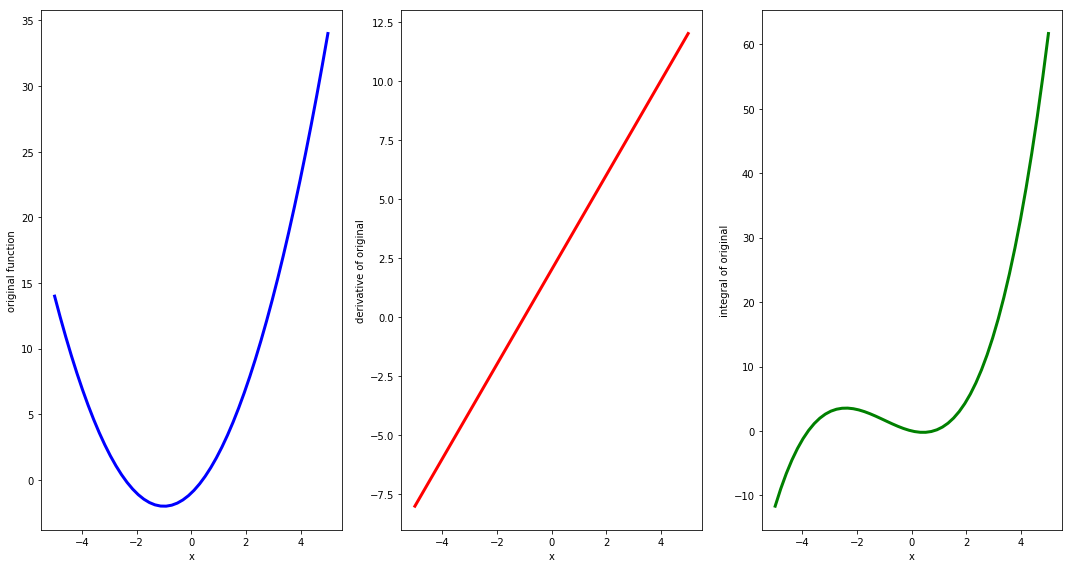

In [11]:
function_evaluator(-5,5,50,x_squared_plus_two_x_minusOne)

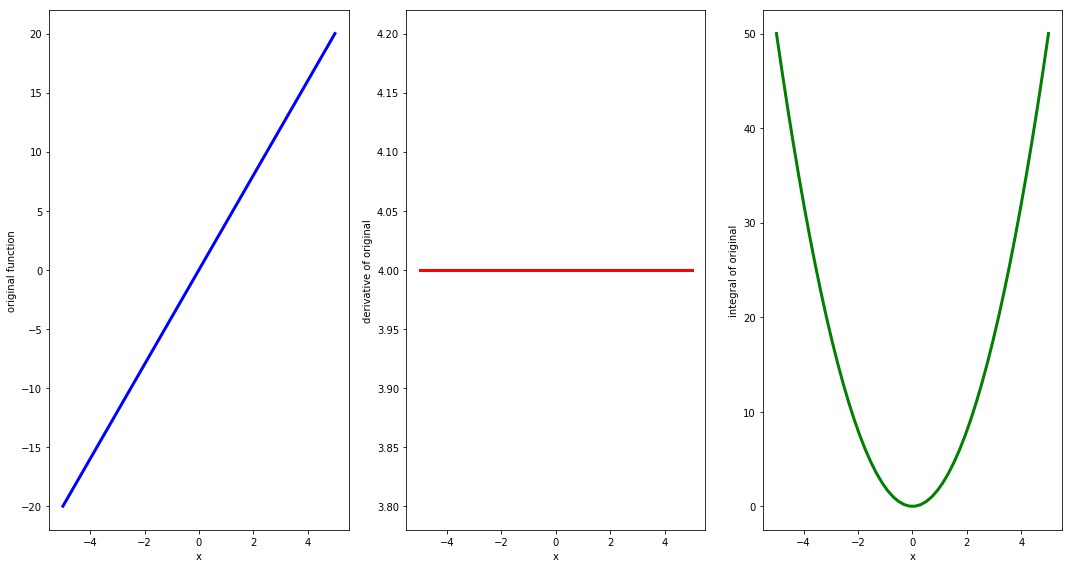

In [13]:
function_evaluator(-5,5,50,four_x)

In [2]:
def string_reverse(string):
    out = str(string)[::-1]
    return out

In [4]:
string_reverse(12345)

'54321'

In [40]:
def even_between(lower, upper):
    start = (lower//2 + lower%2)*2
    end = (upper//2)*2
    n_terms = int(((end-start)/2)+1)
    terms = []
    for i in range(1,n_terms+1):
        t_n = start + 2*(i-1)
        terms.append(t_n)
    return sorted(terms)

In [42]:
even_between(101,115)

[102, 104, 106, 108, 110, 112, 114]

In [75]:
def combine_and_sort(list1, list2):
    if len(list2) >= len(list1):
        for i in range(0,len(list2)):
            list1.append(list2[i])
        return sorted(list1)
    else: 
        for i in range(0,len(list1)):
            list2.append(list1[i])
        return sorted(list2)

In [77]:
combine_and_sort([1,2,3,4,5],[7])

[1, 2, 3, 4, 5, 7]

In [78]:
str1 = 'brad'
str2 = 'drab'

In [80]:
def check_anagram(str1, str2):
    if sorted(str1) == sorted(str2):
        return True
    else: return False

In [82]:
check_anagram('silet', 'listen')

False

In [114]:
def create_dictionary(lower, upper):
    start = (lower//2 + lower%2)*2
    end = (upper//2)*2
    n_terms = int(((end-start)/2)+1)
    terms = []
    for i in range(1,n_terms+1):
        t_n = start + 2*(i-1)
        terms.append(t_n)
    evens = sorted(terms)
    
    start = (lower//2)*2 + 1
    end = (upper//2)*2 - (upper%2)
    n_odd_terms = int(((end-start)/2)+1)
    odd_terms = []
    for i in range(1,n_odd_terms+1):
        t_n_odd = start + 2*(i-1)
        odd_terms.append(t_n_odd)
    odds = sorted(odd_terms)
    dict = {'even': evens, 'odd':odds}
    return dict

In [115]:
create_dictionary(0,10)

{'even': [0, 2, 4, 6, 8, 10], 'odd': [1, 3, 5, 7, 9]}

In [1]:
def to_roman(number):
    ints = (1000, 900,  500, 400, 100,  90, 50,  40, 10,  9,   5,  4,   1)
    nums = ('M',  'CM', 'D', 'CD','C', 'XC','L','XL','X','IX','V','IV','I')
    result = ""
    for i in range(len(ints)):
        count = int(number / ints[i])
        result += nums[i] * count
        number -= ints[i] * count
    return result

In [2]:
to_roman(2131)

'MMCXXXI'